<a href="https://colab.research.google.com/github/sohyun-alicia/deeplearning-tensorflow/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MNIST 데이터셋 다운받기**

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터 다운
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


### **데이터의 형태 확인하기**

In [ ]:
# 학습 데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


### **데이터 그려보기**

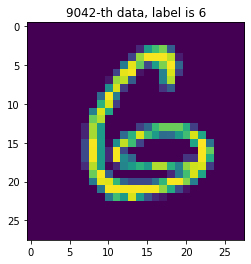

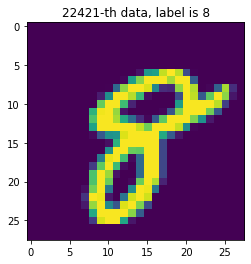

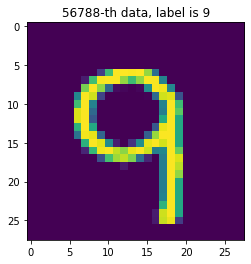

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
# 0~59999의 범위에서 무작위로 세 개의 정수 뽑기
random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' % (idx, label))

### **검증 데이터 만들기**

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


###**모델 입력을 위한 데이터 전처리**

In [ ]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape)        # 모델 입력을 위해 데이터를 784차원으로 변경

(42000, 784)


### **모델 입력을 위한 레이블 전처리**

In [ ]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### **모델 구성하기**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터 형태 명시 필수
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense충
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu'))       # 32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax'))    # 10개의 출력을 가지는 신경망

### **소프트맥스와 시그모이드 값 비교**

In [ ]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m
  arr = np.exp(arr)
  return arr / np.sum(arr)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


###**학습과정 설정하기**

In [ ]:
model.compile(optimizer='adam',       # 옵티마이저 : Adam
              # 손실함수 : categorical_crossentropy
              loss = 'categorical_crossentropy', 
              # 모니터링 할 평가지표
              metrics=['acc'])

### **모델 학습하기**

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 1.8179 - acc: 0.4084 - val_loss: 50.1274 - val_acc: 0.4858
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.9025 - acc: 0.7343 - val_loss: 44.2822 - val_acc: 0.6852
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.6406 - acc: 0.8102 - val_loss: 37.2125 - val_acc: 0.7659
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.5290 - acc: 0.8460 - val_loss: 37.2680 - val_acc: 0.7885
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4622 - acc: 0.8653 - val_loss: 39.5915 - val_acc: 0.7931
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4198 - acc: 0.8785 - val_loss: 40.6042 - val_acc: 0.7967
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3909 - acc: 0.8857 - val_loss: 38.9070 - val_acc: 0.8102
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - l

###**history를 통해 확인할 수 있는 값 출력**

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

###**학습 결과 그려보기**

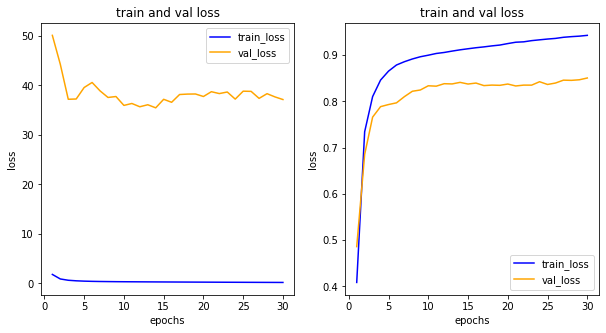

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']       # 검증 데이터가 있는 경우 val_ 수식어가 붙음

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 36.9607 - acc: 0.8543


[36.96074295043945, 0.8543000221252441]

In [ ]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률 : \n{results [0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


###**모델 평가 방법 1 - 혼동행렬**

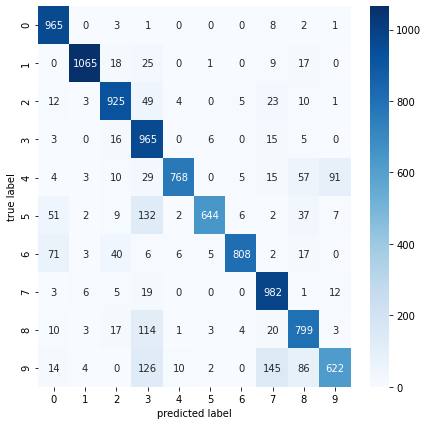

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

###**모델 평가 방법 - 2 분류 보고서**

In [ ]:
print('\n', classification_report(np.argmax(y_test, axis = -1),
                                  np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.85      0.98      0.91       980
           1       0.98      0.94      0.96      1135
           2       0.89      0.90      0.89      1032
           3       0.66      0.96      0.78      1010
           4       0.97      0.78      0.87       982
           5       0.97      0.72      0.83       892
           6       0.98      0.84      0.90       958
           7       0.80      0.96      0.87      1028
           8       0.77      0.82      0.80       974
           9       0.84      0.62      0.71      1009

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000

